In [144]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import os
from glob import glob
import pandas as pd

In [3]:
os.chdir('E:/caiman_scratch')
os.getcwd()

'E:\\caiman_scratch'

In [13]:
f = glob('./fake_server/*7.mat')[0]
print(f)
data = scipy.io.loadmat(f)
data = data['psths'].squeeze()

./fake_server\cm_out_plane2_iter_7.mat


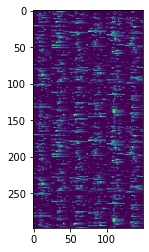

In [72]:
traces = data.reshape((298,-1))
plt.imshow(traces)

In [73]:
times = np.arange(0,298)/10
times = times.astype(np.uint)
times = times.reshape(-1,1)

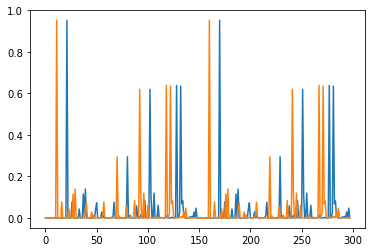

In [77]:
shifted = np.roll(traces[:,1], -10)
plt.plot(traces[:,1])
plt.plot(shifted)

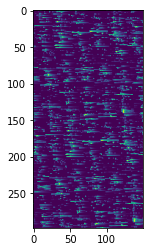

In [172]:
mock = [np.roll(cell_trace, amt) for cell_trace, amt in zip(traces, times)]
plt.imshow(mock)

In [245]:
adj = [np.roll(cell_trace, -amt) for cell_trace, amt in zip(mock, times)]
pad = [(cell_trace[:, time:]=0) for cell_trace, amt in zip(mock, times)]

fig, (ax1, ax2) = plt.subplots(1,3, figszie=(8,4))
ax1.imsohw(mock)
ax2.imshow(adj)


SyntaxError: invalid syntax (<ipython-input-245-37f10c4122cb>, line 2)

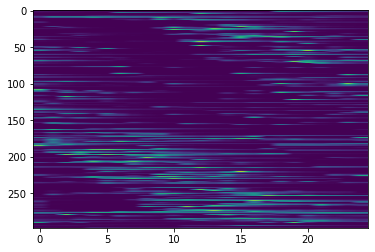

In [242]:
dat = data[1,:,:]
dat = [np.roll(cell_trace, amt) for cell_trace, amt in zip(dat, times)]
plt.imshow(dat, aspect='auto')

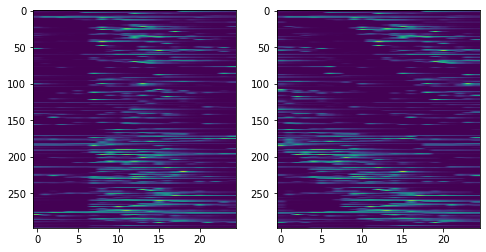

In [266]:
tr = 1

# b = np.array([np.roll(cell_trace, amt, axis=1) for cell_trace, amt in zip(data, times)])
b = np.zeros_like(data)

for i,trial in enumerate(range(data.shape[0])):
    b[i,:,:] = np.array([np.roll(cell_trace, amt) for cell_trace, amt in zip(data[i,:,:], times)])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,4))
ax1.imshow(data[tr,:,:], aspect='auto')
ax2.imshow(b[tr,:,:], aspect='auto')

In [254]:
b.shape

(6, 298, 25)